# MAT 167: Final Project Code/Documentation
## Name: Aditya Mittal; Student ID: 919336522
## 2.3: Handwritten Digit Recognition via SVD

In [1]:
# load necessary modules
from scipy import io 
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds

In [2]:
# load datasets and matrices from usps.mat
data = io.loadmat('usps.mat')
train_patterns = data['train_patterns']
test_patterns = data['test_patterns']
train_labels = data['train_labels']
test_labels = data['test_labels']

In [3]:
# check shape of loaded matrices
print(train_patterns.shape)
print(test_patterns.shape)
print(train_labels.shape)
print(test_labels.shape) # they look as outlined

(256, 4649)
(256, 4649)
(10, 4649)
(10, 4649)


### Part a) Data Exploration

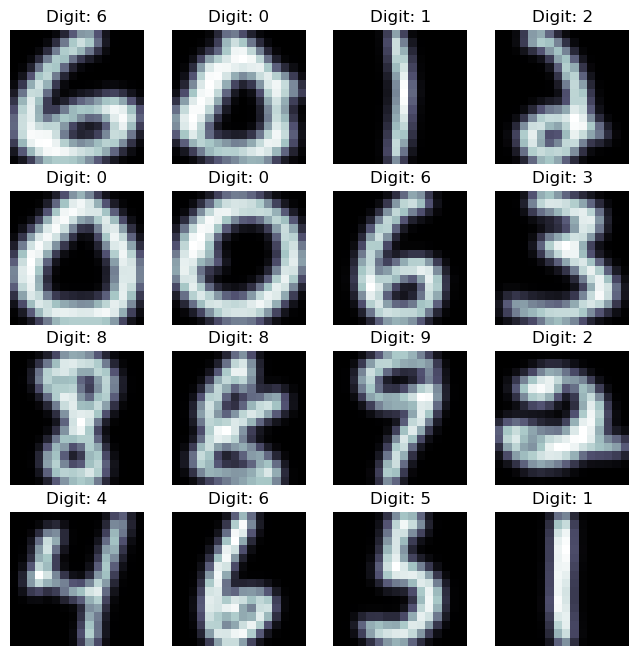

In [4]:
### display the first 16 images in train patterns

# create 4 X 4 plot
fig, axes = plt.subplots(4, 4, figsize = (8,8))

# loop through each row in plot
for i in range(4):
    # loop through each column in plot
    for j in range(4):
        # loop through each column of train_patterns
        image_i = train_patterns[:,(i * 4 + j)].reshape((16, 16)) # reshape into 16 x 16 
        axes[i, j].imshow(image_i, cmap='bone') # display each column digit
        axes[i, j].set_title(f"Digit: {np.argmax(train_labels[:, (i * 4 + j)])}") # create title
        axes[i, j].axis('off') # remove all axes
plt.savefig('train_patterns_16_digits.png')
plt.show()

### Part b) Data Exploration

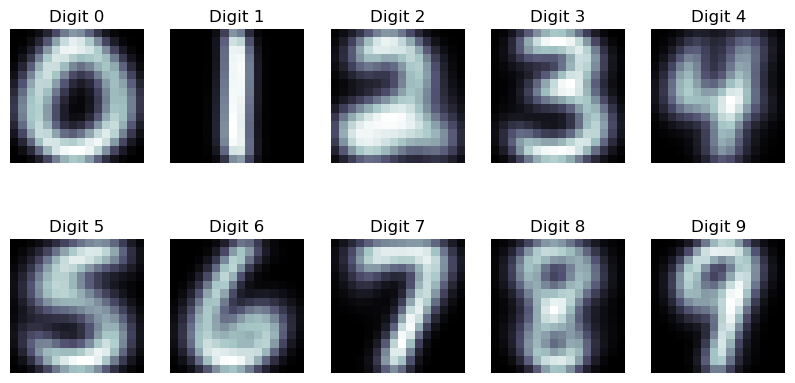

In [5]:
### Compute mean digits
train_aves = np.zeros((256, 10))

for j in range(10):
    digit_images = train_patterns[:, train_labels[j, :] == 1] # pool all images related to digit j
    mean_digit = np.mean(digit_images, axis=1) # Compute the mean along the column axis
    train_aves[:, j] = mean_digit # store mean digit array into each column 
    
# Plot
fig, axes = plt.subplots(2, 5, figsize = (10, 5))

for j in range(10):
    reshaped_mean_digit = train_aves[:, j].reshape((16, 16)) # Reshape each column into a matrix of size 16 × 16
    axes[j // 5, j % 5].imshow(reshaped_mean_digit, cmap='bone') # Display the mean digit image
    axes[j // 5, j % 5].set_title(f"Digit {j}") # title 
    axes[j // 5, j % 5].axis('off') # remove axis
plt.savefig('train_patterns_avg_digits.png')
plt.show()

### Part c) Simple Classifcation Experiment

In [6]:
## Classification

## c1)
test_classif = np.zeros((10, test_patterns.shape[1]))  

# loop through each image in test_patterns - column
for i in range(4648):
    col_i = test_patterns[:,i]
    c = np.zeros(10)
    # loop through each mean column in train_aves
    for j in range(10):
        val = np.sqrt(np.sum((col_i - train_aves[:,j])**2)) # compute distance
        c[j] = val                                          # assign to an array 
    test_classif[:,i] = c                                   # assign array to column
print(test_classif.shape)

(10, 4649)


In [7]:
### example to see what it looks like
test_classif[:,0]

array([ 9.25285287, 15.34623623, 11.59265363, 11.24890758, 13.67636832,
       11.3755955 , 13.09207266, 12.70483175, 12.86320444, 13.72034427])

In [8]:
## c2)
test_classif_res = np.argmin(test_classif, axis=0) # get index of smallest distance to get predictions
test_classif_res = test_classif_res.reshape((1, -1)) # reshape
print(test_classif_res.shape)

(1, 4649)


In [9]:
print((test_classif_res[0])) # print our prediction labels (Y_hats)

[0 6 3 ... 8 3 0]


In [10]:
test_Y = np.argmax(test_labels, axis=0) # print actual test labels
print(test_Y)

[0 6 3 ... 8 5 6]


In [11]:
### c3)
confusion_matrix = np.zeros((10, 10)) 
correct_counts = np.zeros(10)

for k in range(10):
    tmp = test_classif_res[:, np.where(test_labels[k, :] == 1)[0]] # compute classification results on the kth digit
    counts = np.bincount(tmp[0], minlength = 10) # count occurrences of each value in tmp
    confusion_matrix[k,:] = counts # Update the kth row of the confusion matrix
    correct_counts[k] = counts[k] # Update correct counts

# overall classification rate
class_rate = np.sum(correct_counts) / 4649

In [12]:
print(confusion_matrix)

[[656.   1.   3.   4.  10.  19.  73.   2.  17.   1.]
 [  0. 644.   0.   1.   0.   0.   1.   0.   1.   0.]
 [ 14.   4. 362.  13.  25.   5.   4.   9.  18.   0.]
 [  1.   3.   4. 368.   1.  17.   0.   3.  14.   7.]
 [  3.  16.   6.   0. 363.   1.   8.   1.   5.  40.]
 [ 13.   3.   3.  20.  14. 271.   9.   0.  16.   6.]
 [ 24.  11.  13.   0.   9.   3. 353.   0.   1.   0.]
 [  0.   5.   1.   0.   7.   1.   0. 351.   3.  34.]
 [  9.  19.   5.  12.   6.   6.   0.   1. 253.  20.]
 [  1.  15.   0.   1.  39.   2.   0.  24.   3. 314.]]


In [13]:
print(class_rate)

0.8464185846418585


In [14]:
## a different method
confusion_matrix = np.zeros((10, 10), dtype=int) 

for actual, predicted in zip(test_Y, test_classif_res[0]): # zip -> (predicted, actual); if they match +1 
    confusion_matrix[actual, predicted] += 1

# Calculate misclassification rate
misclassification_rate = np.sum(confusion_matrix) - np.trace(confusion_matrix) # error rate
misclassification_rate /= len(test_Y)

In [15]:
print(confusion_matrix) # same result :)

[[656   1   3   4  10  19  73   2  17   1]
 [  0 644   0   1   0   0   1   0   1   0]
 [ 14   4 362  13  25   5   4   9  18   0]
 [  1   3   4 368   1  17   0   3  14   7]
 [  3  16   6   0 363   1   8   1   5  40]
 [ 13   3   3  20  14 271   9   0  16   6]
 [ 24  11  13   0   9   3 353   0   1   0]
 [  0   5   1   0   7   1   0 351   3  34]
 [  9  19   5  12   6   6   0   1 253  20]
 [  1  15   0   1  39   2   0  24   3 314]]


In [16]:
print(1 - misclassification_rate) # accuracy

0.8464185846418585


### Part d)

In [17]:
## svd time
# d1)
k = 25  # example rank for svd - will be used through a function
train_u = np.zeros((256, k, 10)) # initialize tensor

# Perform SVD for each digit
for j in range(10): 
    digit_images = train_patterns[:, train_labels[j, :] == 1] # get all images corresponding to the current digit
    train_u[:, :, j], tmp, tmp2 = svds(digit_images, k)  # Compute the rank k SVD
print(train_u.shape)

(256, 25, 10)


In [18]:
## d2)
test_svd = np.zeros((k, 4649, 10)) # Initialize tensore test_svd 

# expansion coefficients for each test digit; loop through each digit
for j in range(10):
    test_svd[:, :, j] = train_u[:, :, j].T @ test_patterns
print(test_svd.shape)

(25, 4649, 10)


In [19]:
### d3)
test_svdres = np.zeros((10, test_patterns.shape[1])) # Initialize the test_svdres tensore

# Compute the error for each test digit
for j in range(10):
    
    # get rank k approximation using the j-th digit images
    approx = train_u[:, :, j] @ test_svd[:, :, j]
    
    # compute error between the original test digit image and its rank k approximation
    error = np.linalg.norm(test_patterns - approx, None, axis = 0) 
    
    # store error
    test_svdres[j, :] = error 
print(test_svdres.shape)

(10, 4649)


In [20]:
## d4) SVD function
## The steps have already been individually done above, I'm going to pool all of them into singular function
def usps_svd_classification(train_patterns, test_patterns, train_label, test_label, k):
    """
    Implemention of the rank k SVD-based classification on the usps.mat dataset
    INPUT:
    - train_pattern: matrix of dimension 256 X 4649
    - test_pattern: matrix of dimension 256 X 4649
    - train_label: matrix of dimension 10 X 4649
    - test_label: matrix of dimension 10 X 4649
    - k: rank k SVD that user wants to get
    OUTPUT:
    - rate: the overall classification rate of the test_patterns
    - test_predict: the predicted label for the test_patterns
    """
    
    # intialize train_u tensor
    train_u = np.zeros((256, k, 10)) 
    
    # get SVD across each digit
    for digit in range(10):
        # Gather all images corresponding to the current digit
        digit_images = train_patterns[:, train_labels[digit, :] == 1]
        
        # Compute the rank k SVD
        train_u[:, :, digit], tmp, tmp2 = svds(digit_images, k)  
        
    # Initialize test_svd tensor
    test_svd = np.zeros((k, train_patterns.shape[1], 10)) 
    
    # Compute the expansion coefficients for each test digit; we loop through each element
    for j in range(10):
        test_svd[:, :, j] = train_u[:, :, j].T @ test_patterns
        
        
    # Initialize test_svdres tensor
    test_svdres = np.zeros((10, test_patterns.shape[1])) 
    
    # Compute the error for each test digit
    for j in range(10):
        # get rank k approximation using the j-th digit images
        approx = train_u[:, :, j] @ test_svd[:, :, j]
        
        # compute error between the original test digit image and its rank k approximatio
        error = np.linalg.norm(test_patterns - approx, None, axis = 0) 
        
        # store error
        test_svdres[j, :] = error 
      
    # get smallest errors, this will be our predicted class
    test_classif_res = np.argmin(test_svdres, axis=0)
    test_classif_res = test_classif_res.reshape((1, -1))
    
    correct_counts = np.zeros(10) # initialize empty counts
    
    # get occurances as in part c)
    for k in range(10):
        tmp = test_classif_res[:, np.where(test_labels[k, :] == 1)[0]] # classification results on the k-th digit
        counts = np.bincount(tmp[0], minlength=10) # count occurrences of each value 
        correct_counts[k] = counts[k] # sum correct counts
        
    # overall classification rate
    class_rate = np.sum(correct_counts) / 4649 # divide by total
 
    return class_rate,test_classif_res # return error rate and predictions

In [21]:
c = np.zeros(50)
for i in range(1,51):
    a, preds = usps_svd_classification(train_patterns, test_patterns, train_labels, test_labels, k = i)
    c[i - 1] = a

In [22]:
c

array([0.84663368, 0.88061949, 0.92062809, 0.93353409, 0.94235319,
       0.9518176 , 0.9561196 , 0.9574102 , 0.9595612 , 0.9645085 ,
       0.9647236 , 0.9653689 , 0.9636481 , 0.9647236 , 0.9657991 ,
       0.9642934 , 0.9662293 , 0.9642934 , 0.9623575 , 0.9597763 ,
       0.9597763 , 0.9584857 , 0.9559045 , 0.9563347 , 0.9574102 ,
       0.9546139 , 0.9539686 , 0.9546139 , 0.9543988 , 0.9522478 ,
       0.94988169, 0.9513874 , 0.94923639, 0.94859109, 0.94644009,
       0.94687029, 0.94687029, 0.94859109, 0.94751559, 0.94730049,
       0.94665519, 0.94622499, 0.94407399, 0.94364379, 0.94557969,
       0.94557969, 0.94407399, 0.94407399, 0.94342869, 0.94385889])

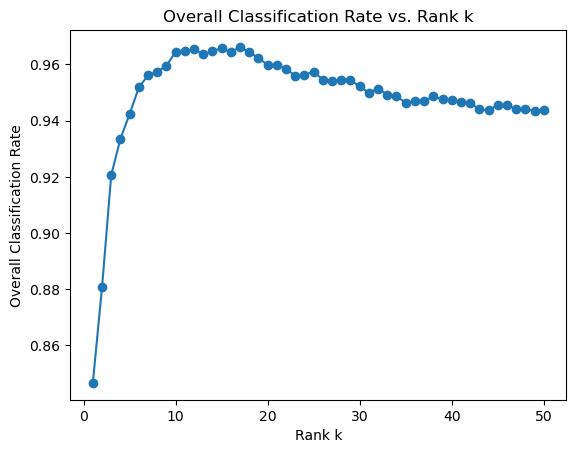

In [23]:
plt.plot(range(1, 51), c, marker='o')
plt.title('Overall Classification Rate vs. Rank k')
plt.xlabel('Rank k')
plt.ylabel('Overall Classification Rate')
plt.savefig('Overall Classification Rate vs. Rank k.png')
plt.show()

In [24]:
a, preds = usps_svd_classification(train_patterns, test_patterns, train_labels, test_labels, k = 17)
print(a)
print(preds[0])

0.9662292966229297
[0 6 3 ... 8 6 6]


In [25]:
print(test_Y)

[0 6 3 ... 8 5 6]


In [26]:
## confusion matrix and error rate (rank = 16):
test_svd_confusion = np.zeros((10, 10), dtype=int)

for actual, predicted in zip(test_Y, preds[0]):
    test_svd_confusion[actual, predicted] += 1

# Calculate misclassification rate
misclassification_rate = np.sum(test_svd_confusion) - np.trace(test_svd_confusion)
misclassification_rate /= len(test_Y)

In [27]:
print(test_svd_confusion)
print(1 - misclassification_rate)

[[772   2   1   3   1   1   2   1   3   0]
 [  0 646   0   0   0   0   0   0   0   1]
 [  3   6 431   6   0   3   1   2   2   0]
 [  1   1   4 401   0   7   0   0   4   0]
 [  2   8   1   0 424   1   1   5   0   1]
 [  2   0   0   5   2 335   7   1   1   2]
 [  6   4   0   0   2   3 399   0   0   0]
 [  0   2   0   0   2   0   0 387   0  11]
 [  2   9   1   5   1   1   0   0 309   3]
 [  0   5   0   1   0   0   0   4   1 388]]
0.9662292966229297
